### Preprocessing/Analysis (28 pts) ###

In [1]:
import pandas as pd
import numpy as np
ect = pd.read_csv('EuCitiesTemperatures.csv')

1. [9 pts] Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.

In [2]:
print(ect.shape, ect.columns)
ect['country'].unique()

(213, 8) Index(['city', 'country', 'population', 'EU', 'coastline', 'latitude',
       'longitude', 'temperature'],
      dtype='object')


array(['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Macedonia',
       'Moldova', 'Montenegro', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom'],
      dtype=object)

In [3]:
countries = ect['country'].unique()
dfs = []
for country in countries[:]:
    lat_mean = round(ect[ect['country']==country]['latitude'].mean() ,2)
    lon_mean = round(ect[ect['country']==country]['longitude'].mean() ,2)
    df = ect[ect['country']==country]
    df['latitude'].fillna(lat_mean, inplace=True)
    df['longitude'].fillna(lon_mean, inplace=True)
    dfs.append(df)
df = pd.concat(dfs)
print(df.head(5),df.shape)

        city  country  population   EU coastline  latitude  longitude  \
0    Elbasan  Albania        2.90   no       yes     41.12      20.08   
1    Andorra  Andorra        0.07   no        no     42.50       1.52   
2  Innsbruck  Austria        8.57  yes        no     47.85      11.41   
3       Graz  Austria        8.57  yes        no     47.08      14.02   
4       Linz  Austria        8.57  yes        no     48.32      14.29   

   temperature  
0        15.18  
1          NaN  
2         4.54  
3         6.91  
4         6.79   (213, 8)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


2. [9 pts] Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)

In [4]:
sub_citi = df.loc[(40 <= ect['latitude']) & (ect['latitude'] <= 60) & (15 <= ect['longitude']) & (ect['longitude'] <= 30)]
city_num_in_country = sub_citi.groupby('country')['city'].count()
city_num_in_country[city_num_in_country == max(city_num_in_country)]
'Poland and Romania'

'Poland and Romania'

3. [10 pts] Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).
For example, if we have a missing temperature value for Bergen, Norway, which is not in the EU but lies on the coast, we will fill it with the average temperature of cities with EU='no' and coastline='yes')

In [14]:
eu_c_df = df.groupby(['EU', 'coastline'])['temperature'].mean()

dfecs = []
for index in eu_c_df.index:
    dfec = df[(df['EU']==index[0])&(df['coastline']==index[1])]
    dfec['temperature'].fillna(round(eu_c_df[index], 2), inplace=True)
    dfecs.append(dfec)

df = pd.concat(dfecs)
df.head()

,city,country,population,EU,coastline,latitude,longitude,temperature
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.48
7,Minsk,Belarus,9.48,no,no,52.61,27.57,5.28
8,Orsha,Belarus,9.48,no,no,52.61,25.63,4.93
9,Pinsk,Belarus,9.48,no,no,52.61,25.63,6.42
10,Brest,Belarus,9.48,no,no,52.10,23.70,6.73


### Visualization (27 pts) ###

1. [6 pts] Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.

Text(0, 0.5, 'Number of countries')

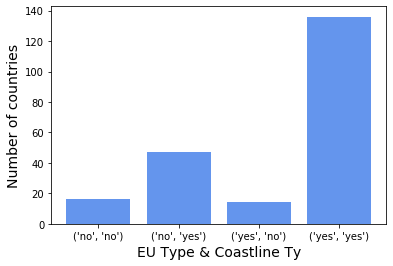

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
series = df.groupby(['EU', 'coastline'])['temperature'].count()
series
plt.bar([str(x) for x in series.index], series, color='cornflowerblue')
plt.xlabel('EU Type & Coastline Ty', fontsize=14)
plt.ylabel('Number of countries', fontsize=14)

2. [7 pts] Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.

Text(0, 0.5, 'Latitude')

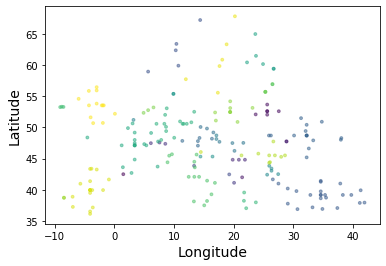

In [67]:
df['color'] = 'green'
#plt.scatter(df['longitude'], df['latitude'], colormap=df['country'])
len(df['country'].unique())
colors = {}
for i, country in enumerate(df['country'].unique()):
    colors[country] = i
df ['color'] = df['country'].apply(lambda x: colors[x])

plt.scatter(x=df['longitude'], y=df['latitude'], c=df['color'], s=8, alpha=0.5)
plt.xlabel('Longitude', fontsize=14, )
plt.ylabel('Latitude', fontsize='14')

3. [6 pts] The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

Text(0.5, 0, 'Population')

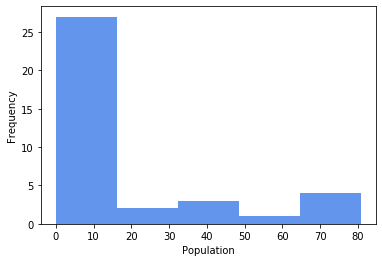

In [75]:
ss = df.groupby('country')['population'].mean()
ss.plot.hist(bins=5, color='cornflowerblue',)
plt.xlabel('Population')

4. [8 pts] Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.

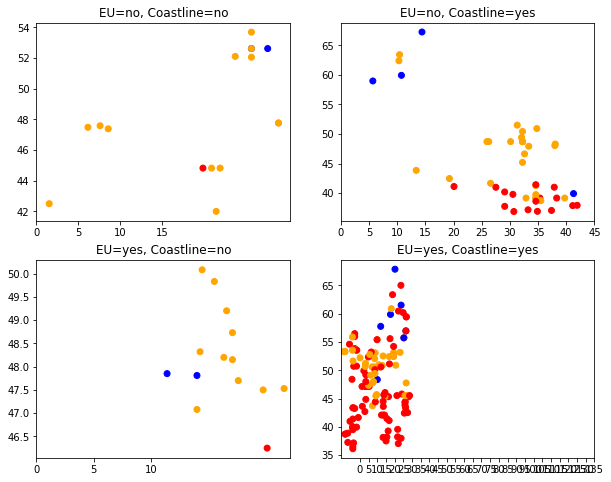

In [93]:
plt.figure(figsize=(10, 8))
def set_color(temperature):
    if temperature > 10:
        return 'red'
    if temperature < 6:
        return 'blue'
    return 'orange'
df['color'] = df['temperature'].apply(lambda x: set_color(x))


for i in range(4):
    dftmp = df[(df['EU']==eu_c_df.index[i][0])&(df['coastline']==eu_c_df.index[i][1])]
    ax  = plt.subplot(2,2, i+1)
    ax.scatter(dftmp['longitude'], dftmp['latitude'],color=dftmp['color'])
    ax.set_title('EU={}, Coastline={}'.format(*eu_c_df.index[i]))
    ax.set_xticks(range(0,dftmp.shape[0],5))


# Problem 2: German Credit Dataset (72 points)

## Preprocessing (31 pts)

### 1. [8 pts] Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns.

In [ ]:
df = pd.read_excel("")